<h2>Time series from a 2-ppm trial</h2>

In [5]:
# Some imports to stop some annoying yellow underlines
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import importlib

# Very important lines to run the setup notebooks!!!
%run do_plot_setup.ipynb
%run do_radical_count_setup.ipynb
get_cl_radical_budget = get_cl_radical_budget # Tautology to get rid of the yellow underlines
import cl2_utilities as cl2_utils
import process_cl2_logfile as process_cl2#This underline is unavoidable

# Extract some shared values that are used to facilitate plotting. Call 'display' on any of them to see their contents.
plot_default_properties = get_and_apply_plot_defaults() #Ignore yellow underline
line_default_properties = get_default_line_properties() #Ignore yellow underline
cl2_experiment_constants = get_cl2_experiment_constants() #Ignore yellow underline
(all_conversion_data,all_bypass_data) = get_experimental_data() #Ignore underline. These two dataframes have all the experimental results.

In [10]:
importlib.reload(process_cl2)
importlib.reload(cl2_utils)

# ************** START DATA PROCESSING ****************
path = (plot_default_properties['base_directory'] + '/10-23 Cl2 Campaign Follow-Ups/data/12-16_2ppm-CH4_sweep_cl2.csv')
exp_name = '01-16-25 Base Case'
info = (path,exp_name,ftir_path)

# Load the file... (path,exp_name,ftir_path)
hush=True
raw_data = process_cl2.extract_data([info[:2]], hush)

importlib.reload(process_cl2)
trim_params = [(0, 300)]
(data, ax1, ax2) = process_cl2.trim_dataframes(raw_data, trim_params, plot=True, which_field='Cl2 LabJack: Cl2 Node A (mV)', which_df=0)
rf = process_cl2.RemovalFinder(data, "01-16_cl2_misc_follow_ups")

importlib.reload(process_cl2)
#@np.vectorize
def subtract_cl2_zero(mv):# This zero stays fixed within a given campaign but may change from campaign to campaign due to tweaking the Cl2 sensor setup
    return (mv-44.1)

def scale_cl2(mv):
    return (mv-44.1)*30/(145-44.1)

current_experiment = '01-16-25 Base Case'
rf.dump_experiment(current_experiment)
data[current_experiment]['Cl2 LabJack: Cl2 reading minus zero (mV)'] = scale_cl2(data[current_experiment]['Cl2 LabJack: Cl2 Node A (mV)'])
plt.close()


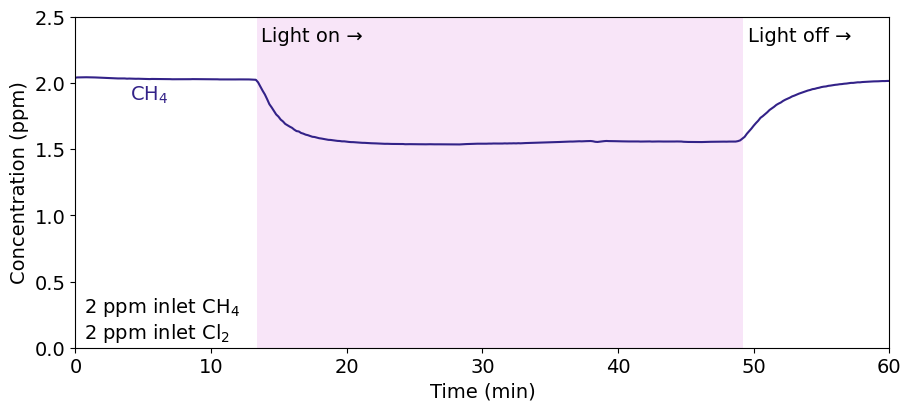

In [62]:
data_2ppm_time_series  = data[current_experiment]

# Plot the methane
min_offset = 202
(fig,ax_2ppm_time_series)=plt.subplots(1,1,figsize=(9,4))
ax_2ppm_time_series.plot(data_2ppm_time_series.Minutes-min_offset, data_2ppm_time_series['Picarro: CH4 (ppm)'], color=line_default_properties['CH4']['color'])
ax_2ppm_time_series.set_xlim(0,60)
ax_2ppm_time_series.set_ylim(0,2.5)

# Add the UV light overlays
(on_times,off_times) = process_cl2.find_UV_changes(data[current_experiment]['UV Light: Actual Status'],data[current_experiment]['Minutes'])
on_times-=(min_offset-1.9)
off_times-=(min_offset-1.9)
for i in range(len(on_times)):
    ax_2ppm_time_series.axvspan(on_times.iloc[i],off_times.iloc[i], color='m', alpha=0.1, lw=0)
ax_2ppm_time_series.text(.29,0.97, 'Light on →',ha='center',va='top',transform=ax_2ppm_time_series.transAxes)
ax_2ppm_time_series.text(0.89,0.97, 'Light off →',ha='center',va='top',transform=ax_2ppm_time_series.transAxes)
ax_2ppm_time_series.text(0.01,0.01,"2 ppm inlet CH$_4$\n2 ppm inlet Cl$_2$",ha='left',va='bottom',transform=ax_2ppm_time_series.transAxes)
ax_2ppm_time_series.text(4,1.87,'CH$_4$',color=line_default_properties['CH4']['color'])
ax_2ppm_time_series.set_ylabel("Concentration (ppm)")
ax_2ppm_time_series.set_xlabel("Time (min)")

plt.savefig('exported_images/time_series_2_ppm.png', bbox_inches='tight',dpi=300)
plt.show()